# Perceptron Lab

This is the scaffold notebook for the perceptron lab and each lab will have a similar scaffold.  Make your own copy of this notebook and then you can fill in the tasks.  **You will fill in code boxes and test boxes with discussion for most tasks** and particularly discussion of results, graphs, etc. Good writing, grammar, punctuation, etc. are important and points will be taken off if these things are lacking. 

In most cases just reporting results without discussion will not receive full credit. Thus, your discussion should also include sentences like the following: This is because…  Note that the …  I was surprised to observe… I am not sure why …, but my hypothesis is that …

Start by looking over the scikit-learn [user guide](https://scikit-learn.org/stable/user_guide.html) and carefully reading over the [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html).

In [6]:
# imports
import numpy as np
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt

def load_data(filename: str, max_itr: int, plot: bool = False) -> None:
    clf = Perceptron(shuffle=False, verbose=1, eta0=.1, max_iter=max_itr)
    Data_Set = arff.loadarff(filename)
    Data_Set_df = pd.DataFrame(Data_Set[0])
    Data_Set_np = Data_Set_df.to_numpy()
    Data_Set_np = Data_Set_np.astype(float)
    X = Data_Set_np[:, :-1]
    y = Data_Set_np[:, -1]
    clf.fit(X, y)
    # Print weights, intercept, and accuracy
    print("Weights:", clf.coef_)
    print("Intercept:", clf.intercept_)
    print("Accuracy:", clf.score(X, y))

    # Plotting if plot is True
    if plot:
        x1_values = X[:, 0]
        x2_values = X[:, 1]

        # Create a new figure for each plot
        plt.figure()

        # Plotting the data points
        plt.scatter(x1_values, x2_values, c=y, cmap=plt.cm.Paired, marker='o')

        # Plotting the decision boundary line
        if len(clf.coef_[0]) == 2:  # Check if there are two features
            x_line = np.linspace(np.min(x1_values), np.max(x1_values), 100)
            y_line = (-clf.coef_[0, 0] / clf.coef_[0, 1]) * x_line - clf.intercept_[0] / clf.coef_[0, 1]

            plt.plot(x_line, y_line, 'k-', label='Decision Boundary')

        # Adding labels and legend
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title('Perceptron Decision Boundary')
        plt.legend()

        # Show the plot
        plt.show()

## 1. Debug and Evaluation

For most labs we will give you some data and expected results so that you can verify that you are doing things right and getting appropriate results.  We will then have you run on some other data with the exact same hyperparameters so we can see if your results are correct. 

### 1.1 Debug (5%)
Download this [data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff) into your local directory and name it debug.arff.  To download rather than view, right-click the link and save as.  To allow consistent results run the Perceptron using the following hyperparameters:
- Learning rate = .1
- Do NOT shuffle the data after every epoch like you would normally do
- Learn for a maximum of 10 epochs
- Start all weights at 0 (which is the default for this scikit-learn implementation)  

Your results should be:
Accuracy = [.875]\
Final Weights = [[-0.23  0.18]]\
[-0.1] - This last weight is the bias weight, which they call the intercept.

To help you with this first task, following is one detailed variation that would do this for you. You may use your own variation.  Note that commonly used variable names in the community are clf (classifier), X (array of input features), y (vector of output labels).

In [7]:
from sklearn.linear_model import Perceptron

load_data('debug.arff', 10)

-- Epoch 1
Norm: 0.04, NNZs: 2, Bias: -0.100000, T: 8, Avg. loss: 0.013500
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 2, Bias: -0.100000, T: 16, Avg. loss: 0.011875
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 2, Bias: -0.100000, T: 24, Avg. loss: 0.010250
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.14, NNZs: 2, Bias: -0.100000, T: 32, Avg. loss: 0.008625
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.18, NNZs: 2, Bias: -0.100000, T: 40, Avg. loss: 0.007000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.21, NNZs: 2, Bias: -0.100000, T: 48, Avg. loss: 0.005375
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.23, NNZs: 2, Bias: -0.100000, T: 56, Avg. loss: 0.008250
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.25, NNZs: 2, Bias: -0.100000, T: 64, Avg. loss: 0.007625
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.27, NNZs: 2, Bias: -0.100000, T: 72, Avg. loss: 0.007000
Total training time: 0.00 seconds.
--

/Users/zacharyburns/Documents/repos/python/201R/venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Notes:
* If you increase (or just remove) max_iter your perceptron will converge to 100% in one more epoch.  Try it!
* verbose (integer) specifies how much info you get after each epoch.  It does not change results.  Try it with 0.
    * Norm is a measure of the total weight magnitudes in the current model.
    * NNZs is the number of non-zero weights there currently are (not including the bias).
    * clf.intercept_ is the value of the bias weight, NOT the actual y-intercept of the decision surface, though it will affect that.
    * T is the total number of weight updates so far.  In this case all the weights were updated each epoch.
    * Avg. loss is another measure of error.  More on that later.
    * The activation function outputs 1 if net > 0, else 0.

### 1.2 (5%) Evaluation

Now run your model  on the [evaluation dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff) and report the final accuracy, weights, and bias. Use the exact same hyperparameters as the debug dataset. The most common reason for results not matching ours is not exactly using the same hyperparameters (e.g. initial weights, training exactly 10 epochs, no shuffling, etc.) Hint: Throughout these labs for the numerous cases where you are doing the same task, but with different data (e.g. debug, eval), you could create a function where you just pass the data set name, so as not to recreate the code multiple times.

In [8]:
# Load evaluation data
# Train on the evaluation data
# print your accuracy and weights. Do not enter these values by hand.

load_data('data_banknote_authentication.arff', 10)


-- Epoch 1
Norm: 1.42, NNZs: 4, Bias: 2.100000, T: 1372, Avg. loss: 0.023615
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.90, NNZs: 4, Bias: 2.600000, T: 2744, Avg. loss: 0.022359
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.62, NNZs: 4, Bias: 3.500000, T: 4116, Avg. loss: 0.028435
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 4.36, NNZs: 4, Bias: 3.700000, T: 5488, Avg. loss: 0.013195
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.51, NNZs: 4, Bias: 4.300000, T: 6860, Avg. loss: 0.015216
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.70, NNZs: 4, Bias: 4.700000, T: 8232, Avg. loss: 0.026061
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 5.40, NNZs: 4, Bias: 4.600000, T: 9604, Avg. loss: 0.018060
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.83, NNZs: 4, Bias: 4.800000, T: 10976, Avg. loss: 0.018378
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.88, NNZs: 4, Bias: 5.200000, T: 12348, Avg. loss: 0.015085
Total training time: 0.00

*Discussion - Open this box and type in your discussion.*  Note that after each exercise you will have a chance to discuss your effort and results.

Final Accuracy = 0.9766763848396501
Final Weights = [-4.28857497 -2.390381   -3.0160324  -1.1686672 ]
Final Bias Weight = [5.2]

I noticed while looking at the training data that the target switches from being 0 to 1 at a certain point. There must be something different about the data to make it so that a change in target is necessary. A quick glance at the data showed that for inputs where the target was 0, the first input was more likely to be positive. On the other hand, inputs where the target was 1, the first input was more likely to be negative. My theory is that the first input of each vector carries the most weight in the decision. That could be why in the final weights, the first weight as the greatest absolute value.

## 2. Classifying on linearly separable and non-linearly separable data

### 2.1 (5%) Create 2 datasets

- Both with 8 instances using 2 real valued inputs with 4 instances from each class. 
- One data set should be linearly separable and the other not.
- Show or print your datasets

In [9]:
# Create and show the 2 datasets. 
# You could do it here in Python or create arff files in your local folder with a text editor.  Either way show your dataset.

# Linearly Separable Dataset
# -0.4, -0.4, 0
# -0.2, -0.2, 0
# 0.2, 0.2, 1
# 0.4, 0.4, 1
# -0.4, 0.4, 1
# -0.2, 0.2, 1
# 0.2, -0.2, 0
# 0.4, -0.4, 0

# Non-linearly Separable Dataset
# 0, 0, 0
# 0, 1, 1
# 1, 0, 1
# 1, 1, 0
# 0.2, 0.2, 0
# 0.8, 0.8, 0
# 0.2, 0.8, 1
# 0.8, 0.2, 1

### 2.2 (5%) Train on both sets using the scikit-learn perceptron model
- Train on each and print the results. Train until convergence (i.e. use the default max_iter by simply not specifying it).
- You may choose your other hyperparameters.

In [10]:
# Train and print results with both datasets
print("Linearly Separable")
load_data('linearly_separable.arff', 1000) # 1000 is the default max_iter as specified in the perceptron documentation
print("\nNon-Linearly Separable")
load_data('non_linearly_separable.arff', 1000)

Linearly Separable
-- Epoch 1
Norm: 0.12, NNZs: 1, Bias: 0.000000, T: 8, Avg. loss: 0.021000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.12, NNZs: 1, Bias: 0.000000, T: 16, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.12, NNZs: 1, Bias: 0.000000, T: 24, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.12, NNZs: 1, Bias: 0.000000, T: 32, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.12, NNZs: 1, Bias: 0.000000, T: 40, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.12, NNZs: 1, Bias: 0.000000, T: 48, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.12, NNZs: 1, Bias: 0.000000, T: 56, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds
Weights: [[0.   0.12]]
Intercept: [0.]
Accuracy: 1.0

Non-Linearly Separable
-- Epoch 1
Norm: 0.06, NNZs: 1, Bias: 0.000000, T: 8, Avg. loss: 0.065000
Total training t

*Discussion*

Linearly Separable Data: Anything where the y value is > 0 yields a 1. Anything where the y value < 0 yields a 0.

Non-Linearly Separable Data: Is modeled after the exclusive or function. The closer x and y are to equivalent, the greater the likelihood that the expected output is a 0. This creates a line down the center of the data that separates one-half of the data in one class from other data in its class.

After making the data, running the learning, and then graphing and viewing the results, I noticed that perceptron found a line such that y = 0x for linearly separable data. This is to be expected since the rule for defining classes was determined based on the sign of the y input.

As for the non-linearly separable data, perceptron got roughly 50% accuracy; as good a guessing. This is also to be expected since the data was not linearly separable. However, I did find it interesting that it drew the line such that y = 0.25x despite there being many different locations that it could draw the line and yield the same results. My hypothesis was that this was because of the order of the data and my ordering caused this particular line. I turned shuffling on and sure enough, the graph produced a different line. From my testing, I only got one other line though.

### 2.3 (10%) Graph the datasets and their corresponding decision line
 
 - Graph each dataset
 - Use your trained perceptrons above to determine each dataset's decision line
    - We discussed how to find the slope and intercept in class and the equation is in the Perceptron slides
 - For all graphs always label the axes!
 - Following are examples of what graphs could look like
 
![Linearly Separable Data](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/linearly_separable.png)

![Not Linearly Separable](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/not_linearly_separable.png)

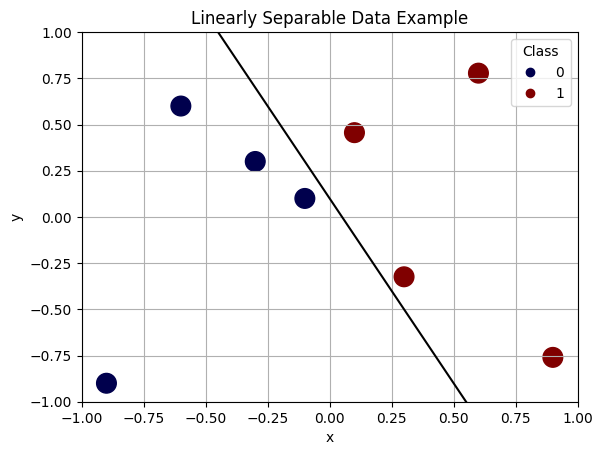

In [11]:
# Sample Graph code, You can use any graphing approach you want including this one.
# We encourage you to use matplotlib.


# The data in this example is made up.  You will use your real data.
data = np.array([[-.9,-.9],[-.6,.6],[-.3,.3],[-.1,.1],[.1,.456],[.3,-.324],[.6,.778],[.9,-.76]])
labels = np.array([0,0,0,0,1,1,1,1])

# Create a scatter plot of data
plt.xlim(-1,1)
plt.ylim(-1,1)
scatter = plt.scatter(data[:,0], data[:,1], c = labels, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend

# Plot the learned separator.  We just made up the slope and intercept for this example. You need to calculate 
# the correct slope and intercept using your learned weights and bias.
xlist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the x axis
ylist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the y axis
slope = -2  # made up
intercept = 0.1 # made up
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Linearly Separable Data Example')
plt.xlabel('x')
plt.ylabel('y')
plt.grid() # add grid lines
plt.show() # show the plot

-- Epoch 1
Norm: 0.12, NNZs: 1, Bias: 0.000000, T: 8, Avg. loss: 0.021000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.12, NNZs: 1, Bias: 0.000000, T: 16, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.12, NNZs: 1, Bias: 0.000000, T: 24, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.12, NNZs: 1, Bias: 0.000000, T: 32, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.12, NNZs: 1, Bias: 0.000000, T: 40, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.12, NNZs: 1, Bias: 0.000000, T: 48, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.12, NNZs: 1, Bias: 0.000000, T: 56, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds
Weights: [[0.   0.12]]
Intercept: [0.]
Accuracy: 1.0


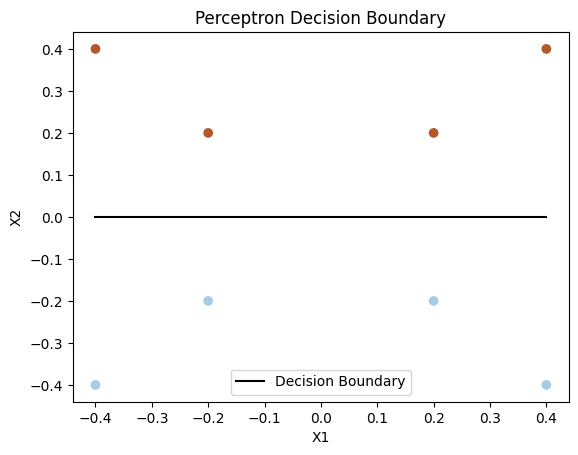


Non-Linearly Separable
-- Epoch 1
Norm: 0.06, NNZs: 1, Bias: 0.000000, T: 8, Avg. loss: 0.065000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.12, NNZs: 1, Bias: 0.000000, T: 16, Avg. loss: 0.060500
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 2, Bias: 0.000000, T: 24, Avg. loss: 0.050500
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.09, NNZs: 2, Bias: 0.000000, T: 32, Avg. loss: 0.049500
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.16, NNZs: 2, Bias: 0.000000, T: 40, Avg. loss: 0.036000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.14, NNZs: 2, Bias: 0.000000, T: 48, Avg. loss: 0.052500
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.12, NNZs: 2, Bias: 0.000000, T: 56, Avg. loss: 0.051500
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.10, NNZs: 2, Bias: 0.000000, T: 64, Avg. loss: 0.050500
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.09, NNZs: 2, Bias: 0.000000, T: 72, Avg. loss: 0.049500
Total training time: 0

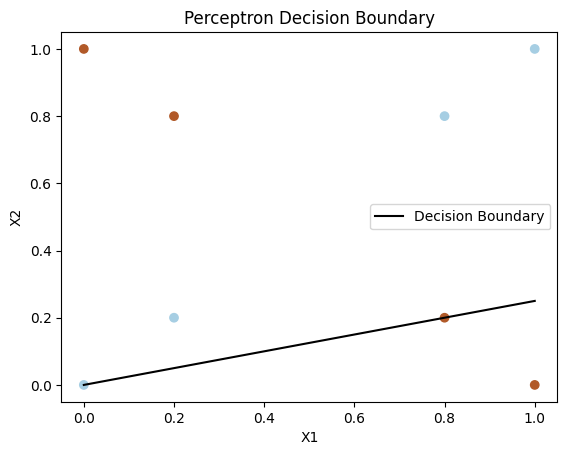

In [12]:
# Graph datasets and print("Linearly Separable")
load_data('linearly_separable.arff', 1000, plot=True) 

print("\nNon-Linearly Separable")
load_data('non_linearly_separable.arff', 1000, plot=True)

*Discussion* 

I discussed the graphs in my previous discussion.

### 2.4 (5%) Discuss why perceptrons in general will not get perfect accuracy on non-linearly separable data

*Discussion*

I feel like it's pretty simple. If the data cannot be separated into classes with a linear function, then the perceptron (something that creates a linear function to separate data into classes) won't be able to do that. It will create a line as best it can, but ultimately, if a line cannot be drawn to perfectly separate the classes, perceptrons will not be perfectly accurate when attempting to separate the classes.

## 3. Use the perceptron to learn this version of the [voting data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting-dataset.arff)

This particular task is an edited version of the standard voting set, where we have replaced all the “don’t know” values with the most common value for the particular attribute. Look at the [tutorial](https://github.com/cs472ta/CS472/blob/master/Tutorial.ipynb) from the Labs Content page to see examples of prepping the voting data set for sklearn.

### 3.1 (10%) Average final training and test set accuracy over multiple trials

- Learn the voting data five times with different random 70/30 Training/Test splits each time
- Use a learning rate of 1.  The other hyperparameters are up to you.
- Report the 5 trials and the average training and test accuracy and number of epochs to converge across the 5 trials in a table 
    - Below is an example of what a 2 trial table might look like

| Trial | Training Accuracy | Test accuracy | Number of epochs |
| --- | --- | --- | --- |
| 1 | .950 | .550 | 4 |
| 2 | .850 | .450 | 6 |
| Average | .900 | .500 | 5 | 

*- As a rough sanity check, typical Perceptron test accuracies for the voting data set are 90%-98%.*


In [13]:
# Run the perceptron 5 times on the voting data set with different splits and record the results.
# Hint: look up scikit-learn train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Create the table using the tool of your choice
voting_data = arff.loadarff('voting-dataset.arff')
voting_df = pd.DataFrame(voting_data[0])
voting_label_encoded_df = voting_df.apply(LabelEncoder().fit_transform)

Data_Set_np = voting_label_encoded_df.to_numpy()

X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]

# create a list of 5 different testing percentages
test_sizes = [0.7, 0.7, 0.7, 0.7, 0.7]

def train_voting_data(x, y, percentage: float):
    # separate data into training and testing splits
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=percentage, test_size=(1-percentage))
    
    # create perceptron
    clf = Perceptron(shuffle=False, verbose=0, eta0=1)
    
    # train perceptron
    clf.fit(x_train, y_train)
    
    # get training accuracy
    train_accuracy = clf.score(x_train, y_train)
    
    # get testing accuracy
    test_accuracy = clf.score(x_test, y_test)
    
    return train_accuracy, test_accuracy, clf.n_iter_
    
    
headers = ["Trial", "Training Accuracy", "Testing Accuracy", "Number of Epochs"]
table = []
for index, percentage in enumerate(test_sizes):
    training_accuracy, testing_accuracy, num_epochs = train_voting_data(X, y, percentage)
    table.append([index + 1, training_accuracy, testing_accuracy, num_epochs])
    
data = np.array(table)
average_training_accuracy = np.mean(data[:, 1])
average_test_accuracy = np.mean(data[:, 2])
average_epochs = np.mean(data[:, 3])
table.append(["Average", average_training_accuracy, average_test_accuracy, average_epochs])
    
from tabulate import tabulate
print(tabulate(table, headers))
    



Trial      Training Accuracy    Testing Accuracy    Number of Epochs
-------  -------------------  ------------------  ------------------
1                   0.965839            0.956835                14
2                   0.956522            0.956835                10
3                   0.934783            0.928058                13
4                   0.97205             0.928058                 9
5                   0.968944            0.956835                12
Average             0.959627            0.945324                11.6


### 3.2 (10%) Interpreting the Model
- Learn with the perceptron once on the full voting data set
- Look at the learned weights and bias and do your best to explain what the model has learned and how the individual input features affect the result. 
- Which specific features are most critical for the voting task, and which are least critical? 

In [14]:
# Learn once on the full voting data set.  If you Look at our tutorial at the beginning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Create the table using the tool of your choice
voting_data = arff.loadarff('voting-dataset.arff')
voting_df = pd.DataFrame(voting_data[0])
voting_label_encoded_df = voting_df.apply(LabelEncoder().fit_transform)

Data_Set_np = voting_label_encoded_df.to_numpy()

X = Data_Set_np[:, :-1] # every row from start to end and every column from start to end (excluding the last column).
y = Data_Set_np[:, -1] # every row, only the last column

clf = Perceptron(shuffle=False, verbose=0, eta0=1)

clf.fit(X, y)
# Print weights, intercept, and accuracy
print("Weights:", clf.coef_)
print("Intercept:", clf.intercept_)
print("Accuracy:", clf.score(X, y))

Weights: [[ 2. -3. -7. 19.  3. -2.  1.  5. -9.  2. -9.  1.  0.  0. -3.  6.]]
Intercept: [-9.]
Accuracy: 0.9674620390455532


Discuss how the different features effect prediction

It appears that 'physician-fee-freeze' is the most critical attribute for the voting task as it has the highest weight. However, looking at the data 'physician-fee-freeze' was the attribute with the greatest number of missing values. This could be an issue given its weight is more than double the magnitude of the next greatest weights: a tie between 'mx-missle' and 'synfuels-corporation-cutback.'

The difference in weights also suggest that some parameters are not useful when determining the voting: 'crime' and 'superfund-right-to-sue.' That's essentially what the weights mean: attributes with a greater magnitude are more important for the decision than attribute weights with a low magnitude. 


### 3.3 (15%) Misclassification rate vs epochs 

Learn with the perceptron once on the full voting data set and graph the misclassification rate (number_misclassified  /  number_of_total_data_points) at each epoch until convergence (0th – final epoch).  Hints:
- For the 0th epoch (i.e. initial weights), assume the initial misclassification rate is 66% and let that be the first point on your graph. Since there are 3 output classes, random guessing would only get it right about 1/3 of the time. Missclassification rate is 1 - accuracy.
- Doing clf.fit with max_iter = 1, and warm_start=True will let you loop through epochs one at a time, allowing you to look at accuracy, etc. after each epoch.  But how do you know how many epochs to run until convergence?  One way is to just to first run it until convergence with random_state = c to see how many epochs it took (n_iter_).  Then run it again one epoch at a time n_iter_ times using the same random_state constant c (so that you get the exact same conditions).
- Below is a rough example of what this type of graph might look like (though this graph is for avg rate across multiple trials)

![Average Misclassification Rate](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/avg_misclassification_rate_vs_epochs.png)

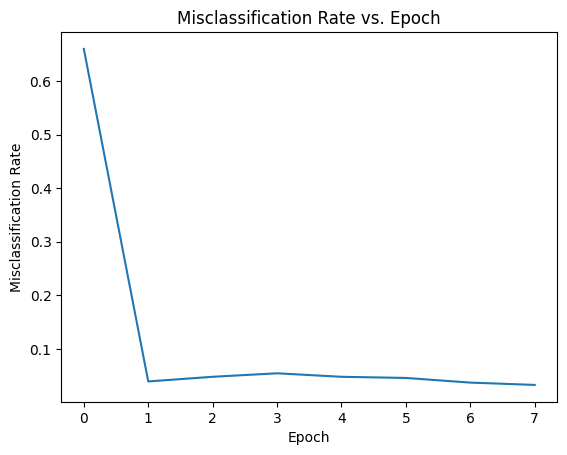

In [15]:
# Learn once on the full voting data set, while gathering info after every epoch
# Then Graph it here.  Here is some sample graph code, but you can do it your own way, including using a bar graph, etc.
 
def plot_misclassification(misclassification_rates):
    """
    Plots the misclassification rates across epochs.
    Args:
        misclassification_rates (list): List of misclassification rates at each epoch.
    """
    plt.plot(np.arange(len(misclassification_rates)), misclassification_rates)
    plt.title("Misclassification Rate vs. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Misclassification Rate")
    plt.show()

voting_data = arff.loadarff('voting-dataset.arff')
voting_df = pd.DataFrame(voting_data[0])
voting_label_encoded_df = voting_df.apply(LabelEncoder().fit_transform)
data_set_np = voting_label_encoded_df.to_numpy()

X = data_set_np[:, :-1]
y = data_set_np[:, -1]

# Identify unique classes in the target variable
classes = np.unique(y)

clf = Perceptron(shuffle=False, verbose=0, eta0=1)

epochs = 8
misclassification_rates = [0.66]

clf.partial_fit(X, y, classes=classes)

for epoch in range(epochs - 1):  # Skip the first epoch as we've already done it
    clf.partial_fit(X, y)
    predictions = clf.predict(X)
    misclassification_rate = (y != predictions).mean()
    misclassification_rates.append(misclassification_rate)

# Plot the misclassification rates after all epochs
plot_misclassification(misclassification_rates)

*Show table and discuss*

It appears as though the perceptron is quickly able to correctly classify the data after only a few epochs. It is interesting how after epoch 1, the missclassification rate increases a bit before dropping lower. I'm not sure if that is just a product of these data or if it's something that is common. 

### 3.4 (15%) Hyperparameters
Read over all the Hyperparameters and their defaults in the scikit [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). With the voting data set, experiment briefly with EACH of the following 6 hyperparameters and discuss your findings.
- shuffle
- eta0 - learning rate
- verbose
- fit_intercept - whether to use a bias weight or not
- random state
- warm start

In [16]:
# Run the model with different hyperparameters
voting_data = arff.loadarff('voting-dataset.arff')
voting_df = pd.DataFrame(voting_data[0])
voting_label_encoded_df = voting_df.apply(LabelEncoder().fit_transform)
data_set_np = voting_label_encoded_df.to_numpy()

X = data_set_np[:, :-1]
y = data_set_np[:, -1]

# DEFAULTS               shuffle=True, verbose=0, eta0=1, fit_intercept=True, random_state=0, warm_start=False
perceptrons = {
    'clf_default': Perceptron(shuffle=True, verbose=0, eta0=1, fit_intercept=True, random_state=0, warm_start=False),
    'clf_shuffle': Perceptron(shuffle=False, verbose=0, eta0=1, fit_intercept=True, random_state=0, warm_start=False),
    'clf_verbose': Perceptron(shuffle=True, verbose=10, eta0=1, fit_intercept=True, random_state=0, warm_start=False),
    'clf_eta': Perceptron(shuffle=True, verbose=0, eta0=0.1, fit_intercept=True, random_state=0, warm_start=False),
    'clf_fit_intercept': Perceptron(shuffle=True, verbose=0, eta0=1, fit_intercept=False, random_state=0, warm_start=False),
    'clf_random': Perceptron(shuffle=True, verbose=0, eta0=1, fit_intercept=True, random_state=None, warm_start=False),
    'clf_warm_start': Perceptron(shuffle=True, verbose=0, eta0=1, fit_intercept=True, random_state=0, warm_start=True),
}

for perceptron in perceptrons.keys():
    print(perceptron)
    
    clf = perceptrons[perceptron]
    
    clf.fit(X, y)
    
    print("Weights:", clf.coef_)
    print("Intercept:", clf.intercept_)
    print("Accuracy:", clf.score(X, y))
    print()
    
    if perceptron == 'clf_warm_start':
        clf.fit(X, y)
        print("Warm Start 2")
        print("Weights:", clf.coef_)
        print("Intercept:", clf.intercept_)
        print("Accuracy:", clf.score(X, y))
        print()
    



clf_default
Weights: [[  0.  -3.  -8.  17.   4.  -2.   5.   6.  -7.   5. -10.  -1.  -1.   0.
   -4.   5.]]
Intercept: [-9.]
Accuracy: 0.9609544468546638

clf_shuffle
Weights: [[ 2. -3. -7. 19.  3. -2.  1.  5. -9.  2. -9.  1.  0.  0. -3.  6.]]
Intercept: [-9.]
Accuracy: 0.9674620390455532

clf_verbose
-- Epoch 1
Norm: 14.28, NNZs: 12, Bias: -2.000000, T: 461, Avg. loss: 0.305857
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 17.26, NNZs: 11, Bias: -3.000000, T: 922, Avg. loss: 0.308026
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 18.97, NNZs: 15, Bias: -5.000000, T: 1383, Avg. loss: 0.255965
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 20.90, NNZs: 15, Bias: -5.000000, T: 1844, Avg. loss: 0.203905
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 22.43, NNZs: 14, Bias: -7.000000, T: 2305, Avg. loss: 0.253796
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 23.17, NNZs: 16, Bias: -8.000000, T: 2766, Avg. loss: 0.208243
Total training time: 0.00 seconds.
-- Epoch 7

Discussion

For each of these hyperparameters, I'm comparing them to a perceptron with all hyperparameters set to the default.

shuffle=False
Produced the same bias but had different accuracies and weights. Accuracies and weights were similar to the default though.

verbose=1
Seems to just print extra information regarding each epoch. A good way to determine how many epochs were done before the perceptron converged. 

eta0=0.1
Seems to have produced a bias and weights that are a factor of 10 smaller than the default perceptron. Accuracy remains similar to the default though. 

fit_intercept=False
Appears to have set the intercept to zero. The weights somewhat resemble the weights of the default perceptron but the accuracy has decreased.

random_state=None
Makes it so that each time the perceptron is fit it gives a different result. 

warm_start=True
I called fit a second time after calling it once with warm start. This second fit gave me new weights, intercept, and accuracy. The accuracy was worse however. 

## 4 (15%) Use the perceptron to learn one other data set of your choice.  
- The UC Irvine Data Repository is one great source, but you may get your data set from wherever you like, though it should be a real world task.
- Report your results

In [17]:
# Load and Train on your dataset and report results
import csv

with open('red_wine_quality.csv') as file:
    reader = csv.reader(file, delimiter=';')
    data_list = [row for row in reader]
    
headers = data_list[0]
    
data_np = np.array(data_list[1:], dtype=float)

X = data_np[:, :-1]
y = data_np[:, -1]

y = np.where(y < 5, 0, 1)

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)

clf = Perceptron(shuffle=True, verbose=0, eta0=1)

# train perceptron
clf.fit(x_train, y_train)

# get training accuracy
train_accuracy = clf.score(x_train, y_train)

# get testing accuracy
test_accuracy = clf.score(x_test, y_test)


print("Weights", clf.coef_)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Weights [[  19.5     -117.355     43.21     -33.5       -9.799     -7.
    49.5      -22.03584 -104.29       8.76       5.3    ]]
Training Accuracy: 0.9588918677390528
Test Accuracy: 0.9583333333333334


*Discuss how the perceptron did on the data set and why you think it performed as such.*

I used a red wine data set that included continuous values about certain characteristics of red wine as well as a quality rating between 0 and 10. I wanted the perceptron figure out whether the specific wine was good or bad quality so I split the rating such that < 5 is bad quality and >= 5 is good quality wine. 

With a 70/30 training/testing split, I was able to get accuracies around 97 at the highest and 86 at the lowest. The perceptron identified volatile acidity and pH values to be the biggest determining factors in high quality wine. A small amount of research confirms this about red wine. However, I do still think there could be problems with using continuous data rather than binary when using a perceptron. 

## 5. (Optional 15% extra credit) Code up your own perceptron learner 

Past versions of this class required students to code up their own version of each model and then compare results with scikit-learn.  Actually coding a model leads to better understanding of what is really happening "under the hood."  Though not required for this class, we give a significant extra credit reward for each lab to those who choose to code their own models.  If you choose to do this, your code must be your own, and NOT taken from any other source (including the text).  Once you are done coding we encourage you to look at other versions to see how yours compares.  Below is a scaffold you could use if you want. Requirements for this task:
- Your perceptron should support the methods shown in the example scaffold below.
- Your output node should output 1 if net is > 0, else 0.
- Use Stochastic/On-line training updates: Iterate and update weights after each training instance (i.e. not batch updates)
- Implement a stopping criteria: when your model has trained for a number of epochs with no improvement in accuracy, stop training. Note that the weights/accuracy do not usually change monotonically.
- Your class can inherit from the relevant scikit-learn learners (e.g. data shuffling, etc.), but don't call any of the super methods to accomplish the core methods in the scaffold.
- Run the evaluation data set and the voting data set above with your Perceptron version. Show and discuss your results and how they compare with the scikit-learn version.

In [72]:
# Your Perceptron Code
from sklearn.base import BaseEstimator, ClassifierMixin
import random

class PerceptronClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, lr=.1, shuffle=True):
        self.lr = lr
        self.shuffle = shuffle
        
    @staticmethod
    def __shuffle(X, y):
        data = list(zip(X, y))
        random.shuffle(data)
        X_shuffled, y_shuffled = zip(*data)
        return X_shuffled, y_shuffled

    def fit(self, X, y, initial_weights=None):
        if self.shuffle:
            X, y = self.__shuffle(X, y)
        self.weights = self.initialize_weights(len(X[0])) if not initial_weights else initial_weights
        
        # calculate weights each row
        # the entire for loop is one epoch
        epoch = 1
        num_correct = 0
        previous_accuracy = 0
        while True:
            # print(f"Epoch: {epoch}")
            epoch += 1
            
            # adjust weights for each row in the epoch
            for row_index, row in enumerate(X):
                output = self.__get_row_prediction(row)
                    
                # if output is not equal to expected, calculate weight change
                expected_output = y[row_index]
                if output != expected_output:
                    # adjust weights
                    self.__update_weights(row, expected_output, output)
                else: # for the accuracy
                    num_correct += 1
                    
            
            accuracy = num_correct / (len(X) * epoch)
            
            if previous_accuracy + 0.01 > accuracy:
                break
            previous_accuracy = accuracy
            
        return self
    
    
    def __update_weights(self, row, expected_output, output):
        for column_index, column in enumerate(row):
            self.weights[column_index] += self.lr * (expected_output - output) * row[column_index]
    
    def __get_net_output(self, row):
        net = 0
        for column_index, column in enumerate(row):
            net += (column * self.weights[column_index])
        net += self.weights[-1]
        return net
    
    @staticmethod
    def __get_output(net):
        return 1 if net > 0 else 0
    
    def __get_row_prediction(self, row):
        net = self.__get_net_output(row)
        output = self.__get_output(net)
        return output

    def predict(self, dataset):
        dataset_predictions = []
        for row in dataset:
            output = self.__get_row_prediction(row)
            dataset_predictions.append(output)
        return dataset_predictions

    def initialize_weights(self, input_size):
        return [0 for _ in range(input_size + 1)]

    def score(self, X, y):
        predictions = self.predict(X)
        num_correct = 0
        for i, prediction in enumerate(predictions):
            if prediction == y[i]:
                num_correct += 1
            
        return num_correct / len(predictions)

    def get_weights(self):
        return self.weights.copy()[:-1]
    
    
voting_data = arff.loadarff('voting-dataset.arff')
voting_df = pd.DataFrame(voting_data[0])
voting_label_encoded_df = voting_df.apply(LabelEncoder().fit_transform)

data_Set_np = voting_label_encoded_df.to_numpy()

X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]

clf = Perceptron(eta0=1, shuffle=True)
print(f"Scikit-learn Accuracy (shuffled): {clf.fit(X, y).score(X, y)}")
print(f"Scikit-learn Weights: {clf.coef_}")

print()

perceptron = PerceptronClassifier(lr=1, shuffle=True)
print(f"PerceptronClassifier Accuracy (shuffled): {perceptron.fit(X, y).score(X, y)}")
print(f"PerceptronClassifier Weights: {perceptron.get_weights()}")

print()
print("Not Shuffled")
print()


clf2 = Perceptron(eta0=.5, shuffle=False)
print(f"Scikit-learn Accuracy: {clf2.fit(X, y).score(X, y)}")
print(f"Scikit-learn Weights: {clf2.coef_}")

print()

perceptron2 = PerceptronClassifier(lr=.5, shuffle=False)
print(f"PerceptronClassifier Accuracy: {perceptron2.fit(X, y).score(X, y)}")
print(f"PerceptronClassifier Weights: {perceptron2.get_weights()}")


Scikit-learn Accuracy (shuffled): 0.9609544468546638
Scikit-learn Weights: [[  0.  -3.  -8.  17.   4.  -2.   5.   6.  -7.   5. -10.  -1.  -1.   0.
   -4.   5.]]

PerceptronClassifier Accuracy (shuffled): 0.9674620390455532
PerceptronClassifier Weights: [-2, -3, -10, 14, 1, -3, 2, 5, -6, 6, -7, 0, 2, -3, -6, 2]

Not Shuffled

Scikit-learn Accuracy: 0.9674620390455532
Scikit-learn Weights: [[ 1.  -1.5 -3.5  9.5  1.5 -1.   0.5  2.5 -4.5  1.  -4.5  0.5  0.   0.
  -1.5  3. ]]

PerceptronClassifier Accuracy: 0.9609544468546638
PerceptronClassifier Weights: [0.0, -2.0, -3.5, 8.0, 1.5, -1.0, 0.0, 2.0, -3.0, 1.5, -5.0, 0.0, -0.5, -0.5, -2.5, 2.0]


*Discussion*

While the weights produced by my perceptron and the scikit perceptron were always different, the accuracies are usually very similar. In fact, when the data is not shuffled, my perceptron is usually only less accurate by less than 1%. When the data is shuffled, my perceptron can sometimes be more accurate than the scikit perceptron. This is likely due to the way the data is shuffled rather than the actual performance of the perceptrons. While testing with different data, my perceptron always produces a slightly lower accuracy when the data was not shuffled. 

I also noticed that I could change the accuracy and number of epochs run by adjusting the change in accuracy before the perceptron would stop. If I set the change value to 0.001, I could get a slightly higher accuracy than I would if I set it to 0.01. However, I'm sure setting this value too low could cause the model to be over-trained.

While I'm not sure exactly why my perceptron does not exactly match the scikit-learn version, I'm happy with how accurate my perceptron was compared to the scikit version. I assume these differences come down to the differences in calculating the change in the weights or maybe even bias. All I know is that despite the weights consistently being different, the accuracies are comparable. 

In [71]:
# Optional scaffold for Extra Credit Perceptron code.  IF you use this feel free to change/add any methods you want.
